# Problem Set 6: Support Vector Machines
This assignment requires a working IPython Notebook installation.

Only PDF files are accepted for submission. To print this notebook to a pdf file, you can go to "File" -> "Download as" -> "PDF via LaTex(.pdf)" or simply use "print" in browser.

**Total**: 100 points (+ 50 bonus points)

In this problem set you will implement an SVM and fit it using quadratic programming. We will use the [CVXOPT](https://cvxopt.org/) module to solve the optimization problems.<br>
You may want to start with solving Problem 1 and reading the textbook, this will help a lot in the programming assignment.<br>

## Problem 1 [30 pts]

### 1.1 Dual Representations [10 pts]

In class we saw that the SVM classifier with parameters $\mathbf{w}, b$ trained on $n$ points $\{\mathbf{x}_i,y_i\}$ can be expressed in either the "primal" form 

$$ h(\mathbf{x}) = sign(\mathbf{w^T x} + b )$$

or the "dual" form
$$ h(\mathbf{x}) = sign( \sum_{i=1}^{n} \alpha_i y_i \mathbf{x_i^T x}  + b)  $$

The dual form involves a "kernel function" which evaluates dot products $\mathbf{x_i^T x}$ between the input point and the training points. We can think of these values as similarities of the input $\mathbf{x}$ to the training points. 

It turns out that many linear models we have seen before can be re-cast into an equivalent "dual representation" in which the predictions are also based on linear combinations of a kernel function evaluated at the training data points.

This is described in sections 6.0-6.1 in Bishop. Read it and work through all of the steps of the derivations in equations 6.2-6.9. You should understand how the derivation works in detail. 

Write down in your own words: *how can the regularized least-squares regression be formulated in the dual form?*

***Solution***

The regularized sum-of-square error function can be written as:
$$
J(w) = \frac{1}{2}\sum_{n=1}^{N} \{w^T \phi(x_n) - t_n\}^2 + \frac{\lambda}{2}w^Tw
$$

By taking the derivative with respect to w and set it to zero:
$$
\frac{\partial J(w)}{\partial w} = \sum_{n=1}^{N}[w^T\phi(x_n) - t_n]\phi(x_n) + \lambda w = 0
$$

We can derive:
$$
w = -\frac{1}{\lambda}\{\sum_{n=1}^{N}[w^T\phi(x_n) - t_n]\phi(x_n)\} = \sum_{n=1}^{N} a_n \phi(x_n) = \Phi^T a
$$
,where $a_n = \frac{1}{\lambda}[w^T\phi(x_n) - t_n]$, and $\Phi$ is the design matrix, whose nth row is given by $\phi(x_n)^T$, the vector $a = (a_1,a_2,\cdots,a_N)^T$.

Then substitute $w = \Phi^T a$ into J(w), and rewrite it as vectorized form
$$
J(a) = \frac{1}{2} [a^T \Phi \Phi^T - t]^2 + \frac{\lambda}{2}(\Phi^T a)^T \Phi^T a \\
= \frac{1}{2}a^T \Phi \Phi^T \Phi \Phi^T a - a^T \Phi \Phi^T t + \frac{1}{2}t^T t + \frac{\lambda}{2} a^T\Phi \Phi^T a
$$
,where $t = (t_1,t_2,\cdots,t_N)^T$

Now define the Gram matrix $K = \Phi\Phi^T$, which is an N by N symmetric matrix with elements:
$$
K_{nm} = \phi(x_n)^T\phi(x_m) = k(x_n, x_m)
$$

Plug in to J(a), we have:
$$
J(a) = \frac{1}{2}a^T KK a - a^T K t + \frac{1}{2}t^T t + \frac{\lambda}{2} a^T K a
$$

By taking the derivative with respect to a and set it to zero:
$$
\frac{\partial J(a)}{\partial a} = \frac{1}{2}(KKa - Kt + \lambda Ka) = 0
$$

We can derive:
$$
a = (K + \lambda I_N)^{-1} t
$$

Finally, substitute the "a" back to the linear regression model, we have:
$$
y(x) = w^T\phi(x) = a^T\Phi \phi(x) = k(x)^T (K + \lambda I_N)^{-1} t
$$
,where the vector k(x) is defined with elements $k_n(x) = k(x_n, x)$(kernel function). 

Notice that the solution for "a" can be expressed as a linear combination of the elements of $\phi(x)$, thus we can recover the original linear regression formulation in terms of the parameter vector "w". Therefore,  we can express the solution of linear regression entirely in terms of the kernel function k(x), which is the dual-form formulation as the last equation above.

### 1.2 Kernels [10 pts]

Read Section 6.2 and verify the results (6.13) and (6.14) for constructing valid kernels, i.e. prove the kernels constructed by (6.13) and (6.14) are valid.

***Solution***

Given valid kernels $k_1(x,x')$:

For $k(x,x') = ck_1(x,x')$:
$$
k(x,x') = ck_1(x,x') = c \phi(x)^T \phi(x') = [\sqrt{c} \phi(x)^T] [\sqrt{c} \phi(x')]
$$

Therefore, the $k(x,x')$ can be written as scalar product in feature space, thus it is a valid kernel.

For $k(x,x') = f(x)k_1(x,x')f(x')$, since f(x) is any function, which is a scalar:
$$
k(x,x') = f(x)\phi(x)^T \phi(x')f(x') = [\phi(x)f(x)]^T [\phi(x')f(x')]
$$

Therefore, the $k(x,x')$ can be written as a product of two scalars in feature space, which are $[\phi(x)f(x)]$ and $[\phi(x')f(x')]$, thus it is a valid kernel.

### 1.3 Maximum Margin Classifiers [10 pts]
Read section 7.1 and show that, if the 1 on the right hand side of the constraint (7.5) is replaced by some arbitrary constant $\gamma > 0$, the solution for maximum margin hyperplane is unchanged.

$$t_n(w^T \phi(x_n) + b) \geq 1$$

***Solution***

The prependicular distance of a point x from a hyperplane defined by y(x) = 0 is given by $|y(x)| / ||w||$, therefore the margin that is given by the prependicular distance to the closest point $x_n$ can be expressed as:
$$
\arg \max_{w,b} \{\frac{1}{||w||} \min_{n} [t_n(w^T \phi(x_n) + b)]\}
$$

Now, substitute 1 with some arbitrary constant $\gamma > 0$, the corresponding constrain is:
$$
t(w^T \phi(x_n) + b) \geq \gamma, \ \ \  n = 1,2, \cdots, N
$$

Then introduce the Lagrange multipliers $a_n \geq 0$:
$$
L(w,b,a) = \frac{1}{2}||w||^2 - \sum_{n=1}^{N} a_n \{t_n(w^T \phi(x_n) + b) - \gamma\}
$$

Set the derivatives of L(w,b,a) with respect to w and b to zero respectively:
$$
\frac{\partial L(w,b,a)}{\partial w} = w - \sum_{n=1}^{N}a_nt_n \phi(x_n) = 0
$$

$$
\frac{\partial L(w,b,a)}{\partial b} = \sum_{n=1}^{N} a_n t_n = 0
$$

Eliminate w and b from L(w,b,a), we have:
$$
\hat{L(a)} = \sum_{n=1}^{N} a_n - \sum_{n=1}^{N} \sum_{m=1}^{N} a_n a_m t_n t_m k(x_n,x_m)
$$

Since the result does not contain $\gamma$, thus the solution for maximum margin hyperplane is unchanged.

## Implementing the SVM
Note, some of the code in cells below will take minutes to run, so feel free to test you code on smaller tasks while you go. Easiest way would be to remove both for-loops and run the code just once.



### Quadratic Programming

The standard form of a Quadratic Program (QP) can be formulated as 
$$
\begin{align}
\min_x\quad &\frac{1}{2} x^TPx + q^Tx\\
\text{subject to }\quad & Gx \preceq h\\
& Ax = b
\end{align}
$$

where $\preceq$ is an element-wise $\leq$.
The CVXOPT solver finds an optimal solution $x^*$, given a set of matrices $P, q, G, h, A, b$.

FYI, you can read about the methods for solving quadratic programming problems [here](https://en.wikipedia.org/wiki/Quadratic_programming#Solution_methods) (optional).

## Problem 2 [10 points]
Design appropriate matrices to solve the following QP problem:

$$
\begin{align}
\min_x\quad &f(x)=x_1^2 + 4x_2^2-8x_1-16x_2\\
\text{subject to }\quad & x_1+x_2\leq 5\\
& x_1 \leq 3\\
& x_2 \geq 0
\end{align}
$$

*Hint: first notice that if $x = [x_1, x_2]^T$ and P is a matrix*
\begin{vmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22} 
\end{vmatrix}

*then $x^T P x = p_{11} x_1^2  + (p_{12} + p_{21}) x_1x_2 +  p_{22} x_2^2. $ We have filled in the correct P below.*

In [1]:
from cvxopt import matrix, solvers
# Turns off the printing of CVXOPT solution for the rest of the notebook
solvers.options['show_progress'] = False

P = 2 * matrix([[1., 0.], [0., 4.]])
#------------------------------------------------------------------------------------------
# Define q, G, h
q = matrix([-8.,-16.]) 
G = matrix([[1.,1.,0.], [1.,0.,-1.]])
h = matrix([5.,3.,0.])
#------------------------------------------------------------------------------------------

sol = solvers.qp(P, q, G, h)
x1, x2 = sol['x']
print('Optimal x: ({:.8f}, {:.8f})'.format(x1, x2))

Optimal x: (2.99999993, 1.99927914)


Let's visualize the solution

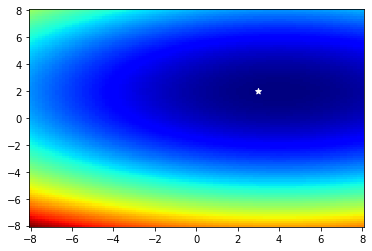

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

X1, X2 = np.meshgrid(np.linspace(-8, 8, 100), np.linspace(-8, 8, 100))
F = X1**2 + 4*X2**2 - 8*X1 - 16 * X2

plt.pcolor(X1, X2, F, cmap='jet', shading="auto")
plt.scatter([x1], [x2], marker='*', color='white')
plt.show()

Why is the solution not in the minimum?

Because $x_1$ and $x_2$ are limited by the constraints, and we can only find the sub-optimal that satisfies these conditions.
$$
\begin{align}
\quad & x_1+x_2\leq 5\\
& x_1 \leq 3\\
& x_2 \geq 0
\end{align}
$$

### Linear SVM

Now, let's implement linear SVM. We will do this for the general case that allows class distributions to overlap, i.e. the linearly non-separable case **(see Bishop 7.1.1)**.

As a linear model, linear SVM produces classification scores for a given sample $x$ as

$$
 \hat y(x) = w^T\phi(x) + b
$$

where $w\in\mathbb{R}^d$, $b\in\mathbb{R}$ are model weights and bias, respectively, and $\phi$ is a fixed feature-space transformation. Final label prediction is done by taking the sign of $\hat y(x)$.

Given a set of training samples $x_n\in\mathbb{R}^d$, $n\in 1,\ldots, N$, with the corresponding labels $y_i\in\{-1, 1\}$ linear SVM is fit (*i.e.* parameters $w$ and $b$ are chosen) by solving the following constrained optimization task:
$$
\begin{align}
    \min_{w, \xi, b}\quad & \frac{1}{2}||w||^2 + C\sum_{n=1}^N \xi_n\\
    \text{subject to }\quad & y_n\hat y(x_n) \geq 1 - \xi_n, & n=1,\ldots, N\\
    & \xi_n \geq 0, & n=1,\ldots, N
\end{align}
$$

Note that the above is a quadratic programming problem.

## Problem 3.1 [50 points]
Your task is to implement the linear SVM above using a QP solver by designing appropriate matrices $P$, $q$, $G$, $h$. Complete the code below.

##### Hints
1. You need to optimize over $w, \xi, b$. You can simply concatenate them into $\chi = (w, \xi, b)$ to feed it into QP-solver. Now, how to define the objective function and the constraints in terms of $\chi$? (For example, $b_1 + b_2$ can be obtained from vector $(a_1, b_1, b_2, c_1, c_2)$ by taking the inner product with $(0, 1, 1, 0, 0)$).
3. You can use `np.bmat` to construct matrices. Like this:

In [3]:
np.bmat([[np.identity(3), np.zeros((3, 1))],
         [np.zeros((2, 3)), -np.ones((2, 1))]])
b = matrix(0.,(3,3))
print(b)
h = matrix([0.] * 3 + [1.] * 3)
k = matrix(np.bmat([[np.ones([3,1]), np.zeros([3,1])]]))
print(h)
print(k)

[ 0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]

[ 1.00e+00  0.00e+00]
[ 1.00e+00  0.00e+00]
[ 1.00e+00  0.00e+00]



In [4]:
from sklearn.base import BaseEstimator


class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
        
    def fit(self, X, Y):
        """Fit Linear SVM using training dataset (X, Y).
        
        :param X: data samples of shape (N, d).
        :param Y: data target labels of size (N). Each label is either 1 or -1.
        """
        # Apply transformation (phi) to X
        if self.transform is not None:
            X = self.transform(X)
        d = len(X[0])
        N = len(X)
        
        #------------------------------------------------------------------------------------------
        # Construct appropriate matrices here to solve the optimization problem described above.
        # We want optimal solution for vector (w, xi, b). 
        P = matrix(np.bmat([[np.identity(d), np.zeros((d, N+1))],
             [np.zeros((N+1, d)), np.zeros((N+1, N+1))]]))
       
        q = matrix(np.bmat([[np.zeros([1,d]),self.C*np.ones([1,N]),np.zeros([1,1])]])).T
        
        G1 = np.bmat([[-np.dot(np.diag(Y), X), -np.eye(N), -Y.reshape((N,1))]])
        G2 = np.bmat([[np.zeros([N,d]),-np.eye(N),np.zeros([N,1])]])
        G = matrix(np.bmat([[G1],[G2]]))
    
        h = matrix(np.bmat([[-np.ones([N,1])],[np.zeros([N,1])]]))
        #------------------------------------------------------------------------------------------
        
        sol = solvers.qp(P, q, G, h)
        ans = np.array(sol['x']).flatten()
        self.weights_ = ans[:d]
        self.xi_ = ans[d:d+N]
        self.bias_ = ans[-1]
        
        #------------------------------------------------------------------------------------------
        
        # Find support vectors. Must be a boolean array of length N having True for support
        # vectors and False for the rest.
        self.support_vectors = self.xi_ > 1e-8        
        #------------------------------------------------------------------------------------------
        
    def predict_proba(self, X):
        """
        Make real-valued prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N predicted scores.
        """
        if self.transform is not None:
            X = self.transform(X)
        y_hat = X @ self.weights_ + self.bias_
        return y_hat
        

    def predict(self, X):
        """
        Make binary prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N binary predicted labels from {-1, 1}.
        """
        return np.sign(self.predict_proba(X))

Let's see how our LinearSVM performs on some data.

In [5]:
from sklearn.datasets import make_classification, make_circles
X = [None, None, None]
y = [None, None, None]
X[0], y[0] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
X[1], y[1] = make_circles(n_samples=100, factor=0.5)
X[2], y[2] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Go from {0, 1} to {-1, 1}
y = [2 * yy - 1 for yy in y]

<ipython-input-6-81e3971017ed>:26: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')


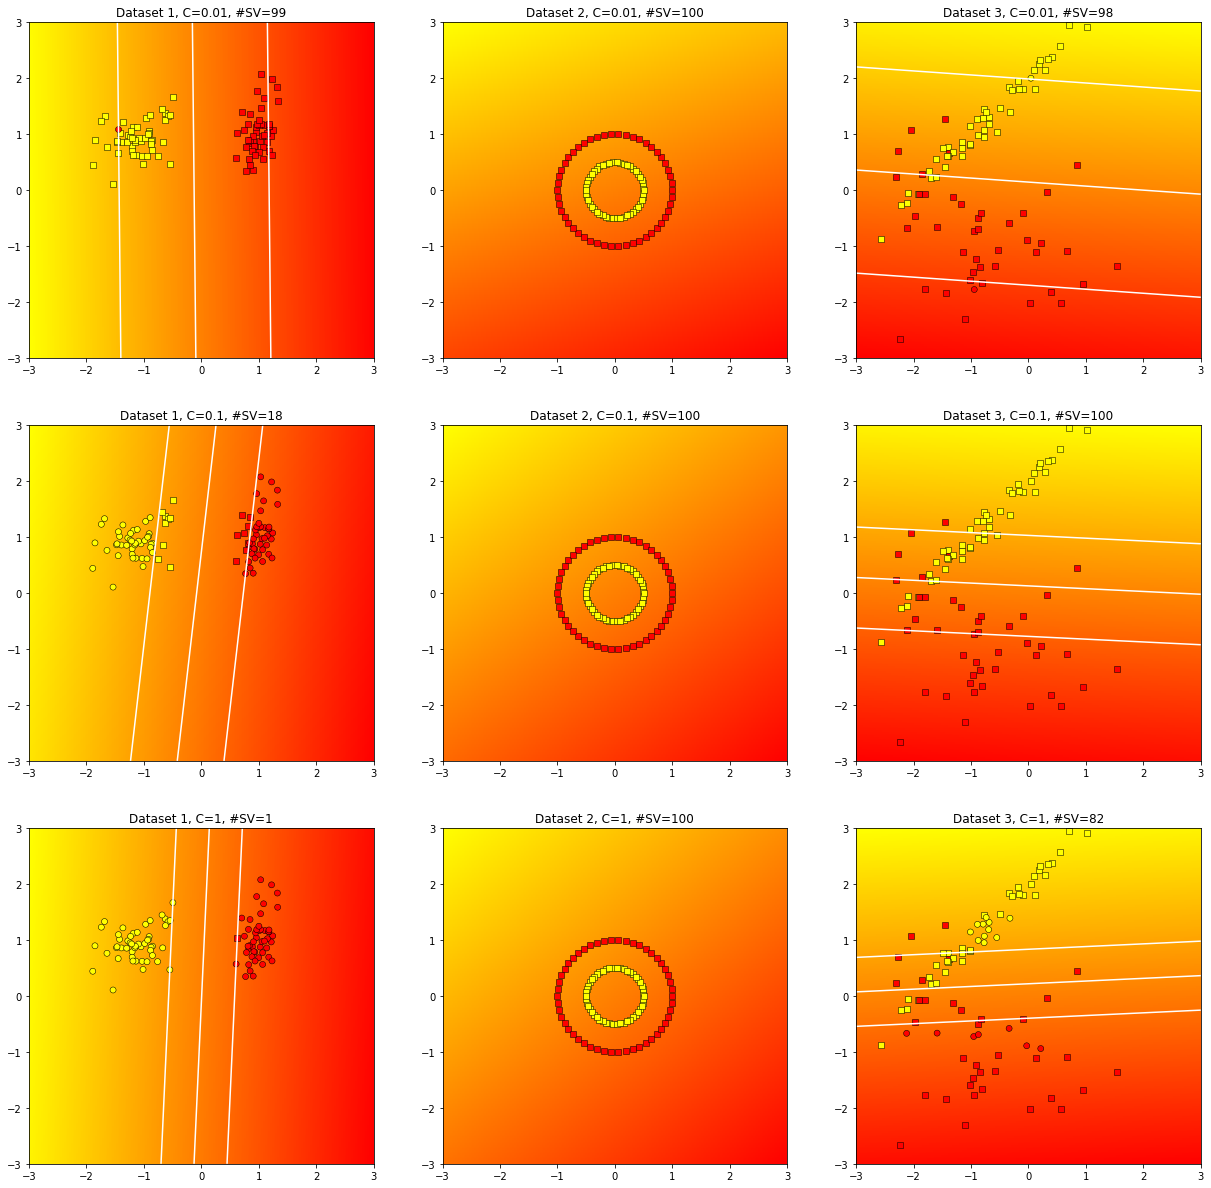

In [6]:
C_values = [0.01, 0.1, 1]

plot_i = 0
plt.figure(figsize=(len(X) * 7, len(C_values) * 7))
for C in C_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = LinearSVM(C=C)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

Why does the number of support vectors decrease as $C$ increases?

For debug purposes: the very last model must have almost the same weights and bias as:

$$w = \begin{pmatrix}-0.0784521\\ 1.62264867\end{pmatrix}$$
$$b = -0.3528510092782581$$

In [7]:
model.weights_

array([-0.0784521 ,  1.62264867])

In [8]:
model.bias_

-0.352851009278258

## Problem 3.2 [10 points]

Even using a linear SVM, we are able to separate data that is linearly inseparable by using feature transformations.

Implement the following feature transformation
$
    \phi(x_1, x_2) = (x_1,\ x_2,\ x_1^2,\ x_2^2,\ x_1x_2)
$
and re-run your SVM.

In [9]:
def append_second_order(X):
    """Given array Nx[x1, x2] return Nx[x1, x2, x1^2, x2^2, x1x2]."""
    X_1 = X[:,0:1]
    X_2 = X[:,1:2]
    new_X = np.concatenate((X_1,X_2,X_1*X_1,X_2*X_2,X_1*X_2),axis=1)
    
    return new_X


assert np.all(append_second_order(np.array([[1, 2]])) == np.array([[1, 2, 1, 4, 2]])), 'Transformation is incorrect.'

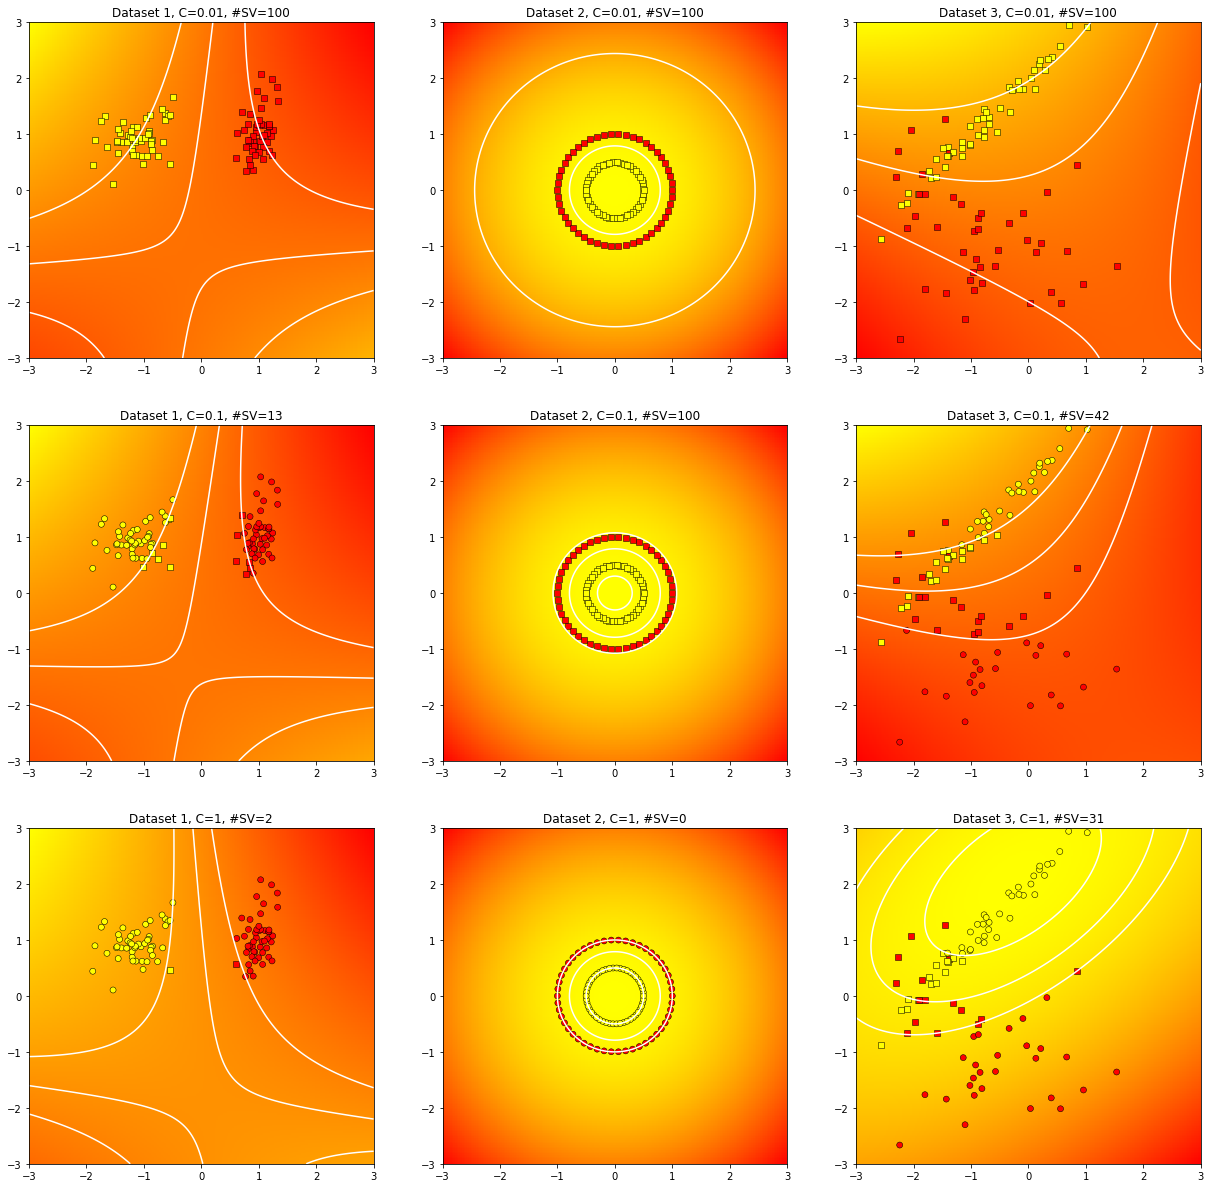

In [10]:
plot_i = 0
C_values = [0.01, 0.1, 1]
plt.figure(figsize=(len(X) * 7, len(C_values) * 7))
for C in C_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = LinearSVM(C=C, transform=append_second_order)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

# Bonus part (Optional)

## Dual representation. Kernel SVM

The dual representation of the maximum margin problem is given by

\begin{align}
    \max_{\alpha}\quad & \sum_{n=1}^N\alpha_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N\alpha_n\alpha_my_ny_mk(x_n, x_m)\\
    \text{subject to }\quad & 0 \leq \alpha_n \leq C,\quad n=1,\ldots, N\\
    & \sum_{n=1}^N\alpha_ny_n = 0
\end{align}

In this case bias $b$ can be computed as
$b = \frac{1}{|\mathcal{S}|}\sum_{n\in \mathcal{S}}\left(y_n - \sum_{m\in \mathcal{S}}\alpha_my_mk(x_n, x_m)\right),$
and the prediction turns into
$\hat{y}(x) = \sum_{n\in \mathcal{S}}\alpha_ny_nk(x_n, x) + b.$

Everywhere above $k$ is a kernel function: $k(x_1, x_2)=\phi(x_1)^T\phi(x_2)$ (and the trick is that we don't have to specify $\phi$, just $k$).

Note, that now
1. We want to maximize the objective function, not minimize it.
2. We have equality constraints. (That means we should use $A$ and $b$ in qp-solver)
3. We need access to the support vectors (but not all the training samples) in order to make a prediction.

## Problem 4.1 [40 points]
Implement KernelSVM

##### Hints
1. What is the variable we are optimizing over?
2. How can we maximize a function given a tool for minimization?
3. What is the definition of a support vector in the dual representation?

In [11]:
class KernelSVM(BaseEstimator):
    def __init__(self, C, kernel=np.dot):
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, Y):
        """Fit Kernel SVM using training dataset (X, Y).
        
        :param X: data samples of shape (N, d).
        :param Y: data target labels of size (N). Each label is either 1 or -1. Denoted as t_i in Bishop.
        """
        N = len(Y)
        
        #------------------------------------------------------------------------------------------
        # Construct appropriate matrices here to solve the optimization problem described above.
        #P = matrix([Y[i] * Y[j] * (X[i] @ X[j]) for i in range(N) for j in range(N)], (N,N))
    
        P = matrix(np.multiply((np.dot(np.array([Y]).T,np.array([Y]))), (X@(X.T))))
        q = matrix(-1.*np.ones(N)) 
        G = matrix(np.bmat([[-1.*np.eye(N)], [1.*np.eye(N)]]))
        h = matrix(np.bmat([np.zeros([1,N]), self.C * np.ones([1,N])])).T        
        A = matrix(1.*Y).T
        b = matrix(0.)
        #------------------------------------------------------------------------------------------
        
        
        sol = solvers.qp(P, q, G, h, A, b)
        self.alpha_ = np.array(sol['x']).flatten()
        
        #------------------------------------------------------------------------------------------
        # Find support vectors. Must be a boolean array of length N having True for support
        # vectors and False for the rest.
        self.support_vectors = self.alpha_ > 1e-8
        #------------------------------------------------------------------------------------------
        
        sv_ind = self.support_vectors.nonzero()[0]
        self.X_sup = X[sv_ind]
        self.Y_sup = Y[sv_ind]
        self.alpha_sup = self.alpha_[sv_ind]
        self.n_sv = len(sv_ind)
        
        #------------------------------------------------------------------------------------------
        # Compute bias
        # self.bias_ = 
        #------------------------------------------------------------------------------------------
        
    def predict_proba(self, X):
        """
        Make real-valued prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N predicted scores.
        """
        pass
        return y_hat
            
    def predict(self, X):
        """
        Make binary prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N binary predicted labels from {-1, 1}.
        """
        return np.sign(self.predict_proba(X))

We can first test our implementation by using the dot product as a kernel function. What should we expect in this case?

NameError: name 'y_hat' is not defined

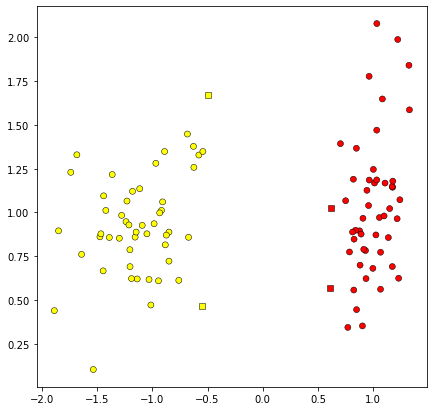

In [12]:
C = 1
i = 0

plt.figure(figsize=(7, 7))
#----------------------------------------------------------------------------
model = KernelSVM(C=C, kernel=np.dot)
#----------------------------------------------------------------------------
model.fit(X[i], y[i])
sv = model.support_vectors
n_sv = sv.sum()
if n_sv > 0:
    plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
if n_sv < len(X[i]):
    plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
xvals = np.linspace(-3, 3, 200)
yvals = np.linspace(-3, 3, 200)
xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

## Problem 4.2 [5 points]
Implement a polynomial kernel function ([wiki](https://en.wikipedia.org/wiki/Polynomial_kernel)).

In [ ]:
def polynomial_kernel(d, c=0):
    """Returns a polynomial kernel FUNCTION."""
    def kernel(x, y):
        """
        :param x: vector of size L
        :param y: vector of size L
        :return: [polynomial kernel of degree d with bias parameter c] of x and y. A scalar.
        """
        kernel = (x.dot(y) + c) ** d
    return kernel

assert polynomial_kernel(d=2, c=1)(np.array([1, 2]), np.array([3, 4])) == 144, 'Polynomial kernel implemented incorrectly'

Let's see how it performs. This might take some time to run.

In [ ]:
plot_i = 0
C = 10
d_values = [2, 3, 4]
plt.figure(figsize=(len(X) * 7, len(d_values) * 7))
for d in d_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(d_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = KernelSVM(C=C, kernel=polynomial_kernel(d))
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, d={}, #SV={}'.format(i + 1, C, d, n_sv))

## Problem 4.3 [5 points]
Finally, you need to implement a **radial basis function** kernel ([wiki](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)).

In [ ]:
def RBF_kernel(sigma):
    """Returns an RBF kernel FUNCTION."""
    def kernel(x, y):
        """
        :param x: vector of size L
        :param y: vector of size L
        :return: [rbf kernel with parameter sigma] of x and y. A scalar.
        """
        kernel = np.exp(-np.sum((x - y)**2) / (2.*sigma))
    return kernel

Let's see how it performs. This might take some time to run.

In [ ]:
plot_i = 0
C_values = [0.1, 1, 10]
sigma_values = [0.1, 1, 10]
plt.figure(figsize=(len(sigma_values) * 7, len(C_values) * 7))
i = 2
for C in C_values:
    for sigma in sigma_values:
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        model = KernelSVM(C=C, kernel=RBF_kernel(sigma))
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, sigma={}, #SV={}'.format(i + 1, C, sigma, n_sv))

## Well done!

Awesome! Now you understand all of the important parameters in SVMs. Have a look at SVM from scikit-learn module and how it is used (very similar to ours). 

In [ ]:
from sklearn.svm import SVC
SVC?

In [ ]:
plot_i = 0
C = 10
d_values = [2, 3, 4]
plt.figure(figsize=(len(X) * 7, len(d_values) * 7))
for d in d_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(d_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = SVC(kernel='poly', degree=d, gamma='auto', probability=True)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        plt.scatter(X[i][:, 0], X[i][:, 1], c=y[i], cmap='autumn', linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] * 2 - 1, xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1., 0., 1.), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, d={}, #SV={}'.format(i + 1, C, d, len(model.support_vectors_)))